In [40]:
#load Data
import numpy as np 
import pandas as pd
import preprocessor as p
import matplotlib.pyplot as plt
import seaborn as sns
import re, string, unicodedata
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from tensorflow import keras

In [2]:
tweets = pd.read_csv('tweets.csv',encoding='utf8')
tweets

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


C:\Users\nunoh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Perbandingan Data Setiap Kelas')

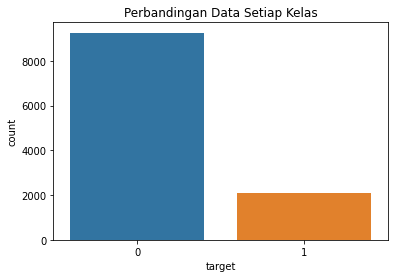

In [3]:
sns.countplot('target', data=tweets)
plt.title('Perbandingan Data Setiap Kelas')

In [4]:
tweets['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [5]:
#preprocessing
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

tweets['textprep'] = tweets.apply(preprocess_tweet, axis=1)

In [6]:
tweets

,id,keyword,location,text,target,textprep
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,"Communal violence in Bhainsa, Telangana. ""Ston..."
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,Telangana: Section has been imposed in Bhainsa...
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,"""Lord Jesus, your love brings freedom and pard..."
...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,Media should have warned us well in advance. T...
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,"ok who remember ""outcast"" nd the ""dora"" au?? T..."


In [7]:
def preprocess_data(data):
 #menghapus angka
 data = data.astype(str).str.replace('\d+', '', regex=True)
 #menjadikan lowercase
 lower_text = data.str.lower()
 #lemmatize
 lemmatizer = nltk.stem.WordNetLemmatizer()
 #tokenize
 w_tokenizer =  TweetTokenizer()

 def lemmatize_text(text):
  return [(lemmatizer.lemmatize(w)) for w \
                       in w_tokenizer.tokenize((text))]
 def remove_punctuation(words):
  new_words = []
  for word in words:
      new_word = re.sub(r'[^\w\s]', '', (word))
      if new_word != '':
         new_words.append(new_word)
  return new_words

 words = lower_text.apply(lemmatize_text)
 words = words.apply(remove_punctuation)
 return pd.DataFrame(words)

prep_tweets = preprocess_data(tweets['textprep'])
tweets['textprep2'] = prep_tweets

In [8]:
tweets

,id,keyword,location,text,target,textprep,textprep2
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,"Communal violence in Bhainsa, Telangana. ""Ston...","[communal, violence, in, bhainsa, telangana, s..."
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,Telangana: Section has been imposed in Bhainsa...,"[telangana, section, ha, been, imposed, in, bh..."
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, at, dealership]"
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, at, dealership]"
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,"""Lord Jesus, your love brings freedom and pard...","[lord, jesus, your, love, brings, freedom, and..."
...,...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,Media should have warned us well in advance. T...,"[medium, should, have, warned, u, well, in, ad..."
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[i, feel, directly, attacked, i, consider, moo..."
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[i, feel, directly, attacked, i, consider, moo..."
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,"ok who remember ""outcast"" nd the ""dora"" au?? T...","[ok, who, remember, outcast, nd, the, dora, au..."


In [11]:
stop_words = set(stopwords.words('english'))
tweets['textprep2'] = tweets['textprep2'].apply(lambda x: [item for item in \
                                    x if item not in stop_words])

In [12]:
tweets

,id,keyword,location,text,target,textprep,textprep2
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,"Communal violence in Bhainsa, Telangana. ""Ston...","[communal, violence, bhainsa, telangana, stone..."
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,Telangana: Section has been imposed in Bhainsa...,"[telangana, section, ha, imposed, bhainsa, jan..."
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, dealership]"
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, dealership]"
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,"""Lord Jesus, your love brings freedom and pard...","[lord, jesus, love, brings, freedom, pardon, f..."
...,...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,Media should have warned us well in advance. T...,"[medium, warned, u, well, advance, wrecked, wh..."
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[feel, directly, attacked, consider, moonbin, ..."
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[feel, directly, attacked, consider, moonbin, ..."
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,"ok who remember ""outcast"" nd the ""dora"" au?? T...","[ok, remember, outcast, nd, dora, au, au, wrec..."


In [13]:
#join tokenize data
tweets['textprep_join'] = tweets['textprep2'].apply(lambda x: ' '.join(x))
tweets

,id,keyword,location,text,target,textprep,textprep2,textprep_join
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,"Communal violence in Bhainsa, Telangana. ""Ston...","[communal, violence, bhainsa, telangana, stone...",communal violence bhainsa telangana stone pelt...
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,Telangana: Section has been imposed in Bhainsa...,"[telangana, section, ha, imposed, bhainsa, jan...",telangana section ha imposed bhainsa january c...
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, dealership]",arsonist set car ablaze dealership
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze at dealership,"[arsonist, set, car, ablaze, dealership]",arsonist set car ablaze dealership
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,"""Lord Jesus, your love brings freedom and pard...","[lord, jesus, love, brings, freedom, pardon, f...",lord jesus love brings freedom pardon fill hol...
...,...,...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,Media should have warned us well in advance. T...,"[medium, warned, u, well, advance, wrecked, wh...",medium warned u well advance wrecked whole nig...
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[feel, directly, attacked, consider, moonbin, ...",feel directly attacked consider moonbin jinjin...
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,i feel directly attacked i consider moonbin &a...,"[feel, directly, attacked, consider, moonbin, ...",feel directly attacked consider moonbin jinjin...
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,"ok who remember ""outcast"" nd the ""dora"" au?? T...","[ok, remember, outcast, nd, dora, au, au, wrec...",ok remember outcast nd dora au au wrecked nerv...


In [15]:
neg, pos = np.bincount(tweets['target'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 11370
    Positive: 2114 (18.59% of total)



In [16]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.61
Weight for class 1: 2.69


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional,Dropout

In [18]:
token = Tokenizer()
token.fit_on_texts(tweets['textprep_join'])

In [19]:
word_index = token.word_index

In [20]:
vocab_size = len(token.word_index) + 1
vocab_size

18436

In [21]:
text_code = token.texts_to_sequences(tweets['textprep_join'])
max_length = 45
X = pad_sequences(text_code, maxlen=max_length, padding='post')

In [22]:
y = tweets['target']

In [23]:
print(X.shape)
print(y.shape)

(11370, 45)
(11370,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [25]:
# Read GloVE embeddings
path_to_glove_file = 'glove.6B.200d.txt'

# Read word vectors
embeddings_index = {}
with open(path_to_glove_file,  encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [26]:
num_tokens = vocab_size
embedding_dim = 200
hits = 0
misses = 0

# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 15285 words (3150 misses)


In [27]:
model = Sequential()
model.add(Embedding(num_tokens, embedding_dim, input_length = X_train.shape[1], weights=[embedding_matrix], trainable=False))
#model.add(Embedding(vocabSize, embedding_size, input_length=X_train.shape[1]))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 200)           3687200   
                                                                 
 bidirectional (Bidirectiona  (None, 45, 128)          135680    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 45, 128)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [41]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [42]:
adam = Adam(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=METRICS)

In [43]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

In [44]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    callbacks=[callback],
                    class_weight=class_weight
                   )

Epoch 1/30
285/285 [==============================] - 21s 52ms/step - loss: 0.3329 - tp: 1470.0000 - fp: 1128.0000 - tn: 6277.0000 - fn: 221.0000 - accuracy: 0.8517 - precision: 0.5658 - recall: 0.8693 - auc: 0.9332 - prc: 0.7905 - val_loss: 0.2861 - val_tp: 329.0000 - val_fp: 160.0000 - val_tn: 1691.0000 - val_fn: 94.0000 - val_accuracy: 0.8883 - val_precision: 0.6728 - val_recall: 0.7778 - val_auc: 0.9244 - val_prc: 0.7860
Epoch 2/30
285/285 [==============================] - 13s 46ms/step - loss: 0.2730 - tp: 1533.0000 - fp: 945.0000 - tn: 6460.0000 - fn: 158.0000 - accuracy: 0.8787 - precision: 0.6186 - recall: 0.9066 - auc: 0.9552 - prc: 0.8422 - val_loss: 0.3695 - val_tp: 369.0000 - val_fp: 309.0000 - val_tn: 1542.0000 - val_fn: 54.0000 - val_accuracy: 0.8404 - val_precision: 0.5442 - val_recall: 0.8723 - val_auc: 0.9303 - val_prc: 0.8040
Epoch 3/30
285/285 [==============================] - 14s 49ms/step - loss: 0.2159 - tp: 1547.0000 - fp: 651.0000 - tn: 6754.0000 - fn: 144.000

In [45]:
model.evaluate(X_test, y_test, verbose=0)

[0.2861454486846924,
 329.0,
 160.0,
 1691.0,
 94.0,
 0.8883025646209717,
 0.6728016138076782,
 0.7777777910232544,
 0.9243550300598145,
 0.7859795689582825]

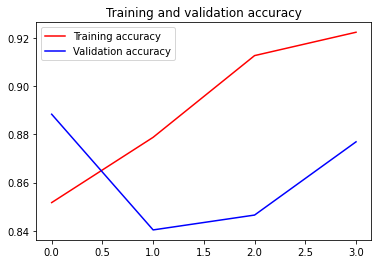

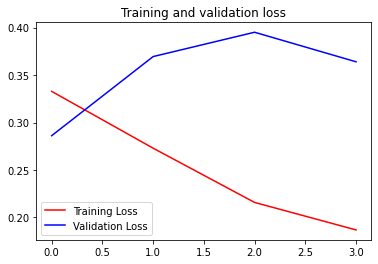

In [46]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
train_predictions_baseline = model.predict(X_train, batch_size=45)
test_predictions_baseline = model.predict(X_test, batch_size=45)

In [48]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.2861454486846924
tp :  329.0
fp :  160.0
tn :  1691.0
fn :  94.0
accuracy :  0.8883025646209717
precision :  0.6728016138076782
recall :  0.7777777910232544
auc :  0.9243550300598145
prc :  0.7859795689582825

Legitimate Transactions Detected (True Negatives):  1691
Legitimate Transactions Incorrectly Detected (False Positives):  160
Fraudulent Transactions Missed (False Negatives):  94
Fraudulent Transactions Detected (True Positives):  329
Total Fraudulent Transactions:  423


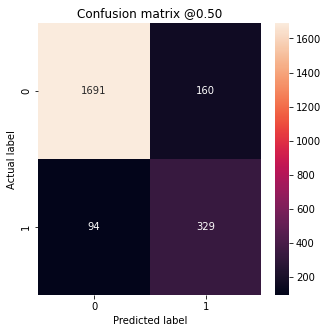

In [49]:
baseline_results = model.evaluate(X_test, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)